In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [2]:
%run scripts/a_data_loading_cleaning.py
df = df_controlled_cleaned_dropped_2

Columns in cleaned DataFrame:
Index(['config_name', 'experiment_id', 'date_time', 'model', 'num_processes',
       'batch_size___fixed_batching', 'decoder_temperature', 'decoder_top_k',
       'decoder_top_p', 'latency_simulation_delay_min',
       ...
       'ram_energy_total', 'per-process_emissions_0',
       'per-process_emissions_1', 'per-process_emissions_2',
       'per-process_emissions_3', 'models', 'decoder_config_decoding_mode',
       'latency_simulation_simulate', 'latency_simulation_delay_max',
       'total_generated_tokens'],
      dtype='object', length=111)

Summary statistics:
       experiment_id  num_processes  batch_size___fixed_batching  \
count      90.000000      90.000000                    90.000000   
mean      280.311111       3.933333                    16.166667   
std        28.869191       0.390908                     5.983592   
min       233.000000       1.000000                     1.000000   
25%       256.250000       4.000000                    16

In [3]:
# verify  flops constant
unique_flops = df['flops'].unique()
print("Unique FLOPs values in controlled experiments:", unique_flops)

Unique FLOPs values in controlled experiments: [16949970993152]


In [4]:
# Check column names
df.columns

Index(['config_name', 'experiment_id', 'date_time', 'model', 'num_processes',
       'batch_size___fixed_batching', 'decoder_temperature', 'decoder_top_k',
       'decoder_top_p', 'latency_simulation_delay_min',
       'latency_simulation_simulate_burst', 'latency_simulation_burst_size',
       'latency_simulation_burst_interval', 'fp_precision', 'quantization',
       'load_in_8bit', 'load_in_4bit', 'total_input_tokens', 'total_params',
       'max_input_tokens', 'max_output_tokens', 'number_input_prompts',
       'total_energy_kwh', 'total_energy_joules', 'flops', 'tokens_per_joule',
       'joules_per_token', 'flops_per_joule', 'joules_per_flop',
       'total_inference_time_sec', 'average_latency_ms_per_batch',
       'throughput_queries_per_sec', 'throughput_tokens_per_sec',
       'total_energy_kwh_process_0', 'total_energy_kwh_process_1',
       'total_energy_kwh_process_2', 'total_energy_kwh_process_3',
       'gpu_power_avg', 'ram_power_avg', 'cpu_energy_total',
       'gpu_en

In [5]:
# check config names
df['config_name'].unique()

array(['num_processes_1', 'num_processes_2', 'num_processes_3',
       'num_processes_4', 'batching_1', 'batching_2', 'batching_4',
       'batching_8', 'batching_16', 'batching_32', 'batching_64',
       'precis_float32_quant_False_quant8_False_quant4_False',
       'precis_float16_quant_False_quant8_False_quant4_False',
       'precis_float16_quant_True_quant8_True_quant4_False',
       'precis_float16_quant_True_quant8_False_quant4_True',
       'decoding_greedy_decoder_temperature_0',
       'decoding_greedy_decoder_temperature_0.2',
       'decoding_greedy_decoder_temperature_0.4',
       'decoding_greedy_decoder_temperature_0.6',
       'decoding_greedy_decoder_temperature_0.8',
       'decoding_greedy_decoder_temperature_1.0',
       'decoding_greedy_decoder_temperature_1.2',
       'decoding_top_k_decoder_top_k_20_decoder_temperature_0',
       'decoding_top_k_decoder_top_k_50_decoder_temperature_0',
       'decoding_top_k_decoder_top_k_100_decoder_temperature_0',
       'decod

In [12]:
df.head()

,config_name,experiment_id,date_time,model,num_processes,batch_size___fixed_batching,decoder_temperature,decoder_top_k,decoder_top_p,latency_simulation_delay_min,latency_simulation_simulate_burst,latency_simulation_burst_size,latency_simulation_burst_interval,fp_precision,quantization,load_in_8bit,load_in_4bit,total_input_tokens,total_params,max_input_tokens,max_output_tokens,number_input_prompts,total_energy_kwh,total_energy_joules,flops,tokens_per_joule,joules_per_token,flops_per_joule,joules_per_flop,total_inference_time_sec,average_latency_ms_per_batch,throughput_queries_per_sec,throughput_tokens_per_sec,total_energy_kwh_process_0,total_energy_kwh_process_1,total_energy_kwh_process_2,total_energy_kwh_process_3,gpu_power_avg,ram_power_avg,cpu_energy_total,gpu_energy_total,decoder_config_decoding_mode,latency_simulation_simulate,latency_simulation_delay_max,total_generated_tokens,flops_per_token,energy_per_token_kwh,divergence_energy_flops
0,num_processes_1,233,"April 11, 2025 at 05:02:12 PM",TinyLlama/TinyLlama-1.1B-Chat-v1.0,1,16,1.0,0,0.0,0.0,False,0,0.0,torch.float16,True,False,True,16384,615606272,128,128,128,0.003973,14303.761229,16949970993152,1.145433,0.873032,1.185001e+09,8.438812e-10,37.073360,4634.170037,3.452614,441.934582,0.003973,NaN,NaN,NaN,46.225986,0.923219,0.001241,0.002724,NaN,False,0.0,16384,1.034544e+09,2.425090e-07,2.344114e-16
1,num_processes_2,234,"April 11, 2025 at 05:03:25 PM",TinyLlama/TinyLlama-1.1B-Chat-v1.0,2,16,1.0,0,0.0,0.0,False,0,0.0,torch.float16,True,False,True,16384,615606272,128,128,128,0.009084,32700.724679,16949970993152,0.501029,1.995894,5.183362e+08,1.929250e-09,37.114287,4639.285860,3.448807,441.447253,0.004542,0.004542,NaN,NaN,0.000000,0.949830,0.002359,0.006706,NaN,False,0.0,16384,1.034544e+09,5.544150e-07,5.359027e-16
2,num_processes_3,235,"April 11, 2025 at 05:04:40 PM",TinyLlama/TinyLlama-1.1B-Chat-v1.0,3,16,1.0,0,0.0,0.0,False,0,0.0,torch.float16,True,False,True,16384,615606272,128,128,128,0.014652,52747.350103,16949970993152,0.310613,3.219443,3.213426e+08,3.111943e-09,37.785984,4723.248003,3.387499,433.599929,0.004947,0.004858,0.004846,NaN,284.802324,0.954332,0.002769,0.011857,NaN,False,0.0,16384,1.034544e+09,8.942897e-07,8.644287e-16
3,num_processes_4,236,"April 11, 2025 at 05:05:55 PM",TinyLlama/TinyLlama-1.1B-Chat-v1.0,4,16,1.0,0,0.0,0.0,False,0,0.0,torch.float16,True,False,True,16384,615606272,128,128,128,0.022451,80824.506502,16949970993152,0.202711,4.933136,2.097133e+08,4.768416e-09,37.507834,4688.479238,3.412620,436.815414,0.005594,0.005580,0.005645,0.005633,453.303389,0.958816,0.004173,0.018244,NaN,False,0.0,16384,1.034544e+09,1.370316e-06,1.324560e-15
4,batching_1,237,"April 11, 2025 at 05:13:02 PM",TinyLlama/TinyLlama-1.1B-Chat-v1.0,4,1,1.0,0,0.0,0.0,False,0,0.0,torch.float16,True,False,True,16384,615606272,128,128,128,0.173708,625349.848478,16949970993152,0.023441,42.659789,2.710478e+07,3.689386e-08,384.649219,3005.072024,0.332771,38.110047,0.043280,0.043460,0.043619,0.043349,691.338204,0.951091,0.042788,0.130587,NaN,False,0.0,14659,1.156284e+09,1.184994e-05,1.024829e-14


# Exploratory Data Analysis (EDA)

Columns in cleaned DataFrame:
Index(['config_name', 'experiment_id', 'date_time', 'model', 'num_processes',
       'batch_size___fixed_batching', 'decoder_temperature', 'decoder_top_k',
       'decoder_top_p', 'latency_simulation_delay_min',
       ...
       'ram_energy_total', 'per-process_emissions_0',
       'per-process_emissions_1', 'per-process_emissions_2',
       'per-process_emissions_3', 'models', 'decoder_config_decoding_mode',
       'latency_simulation_simulate', 'latency_simulation_delay_max',
       'total_generated_tokens'],
      dtype='object', length=111)

Summary statistics:
       experiment_id  num_processes  batch_size___fixed_batching  \
count      90.000000      90.000000                    90.000000   
mean      280.311111       3.933333                    16.166667   
std        28.869191       0.390908                     5.983592   
min       233.000000       1.000000                     1.000000   
25%       256.250000       4.000000                    16

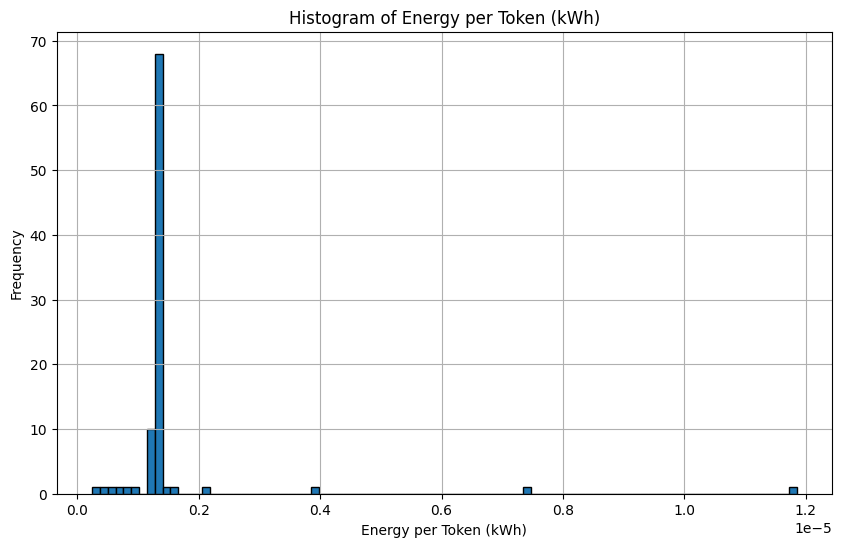

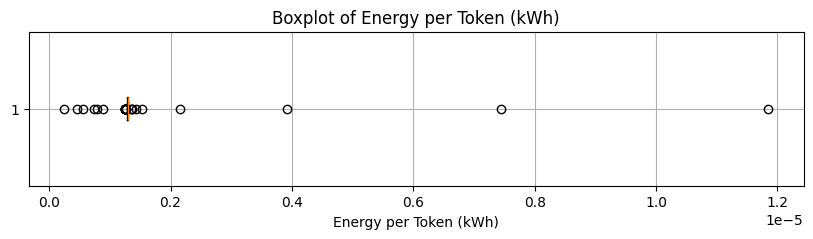

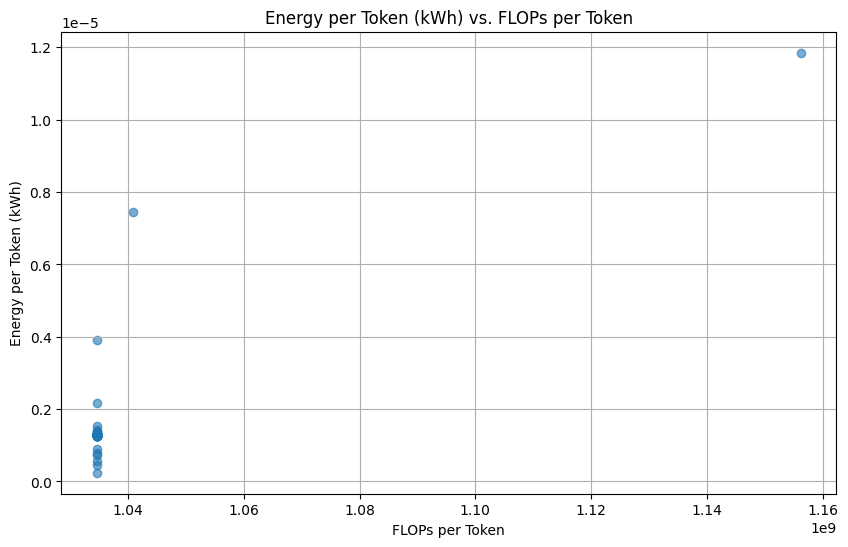

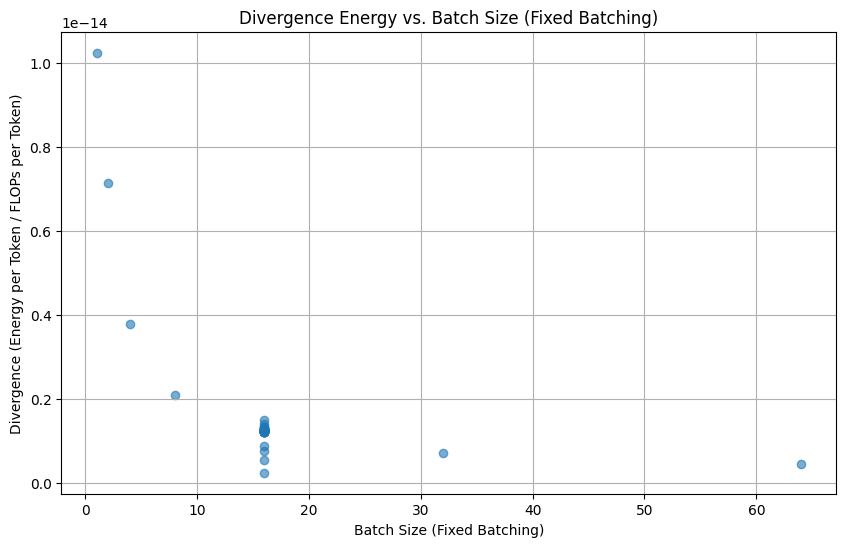

Correlation Matrix:
                         flops  total_generated_tokens  flops_per_token  \
flops                      NaN                     NaN              NaN   
total_generated_tokens     NaN                1.000000        -0.999983   
flops_per_token            NaN               -0.999983         1.000000   
energy_per_token_kwh       NaN               -0.859407         0.856858   
divergence_energy_flops    NaN               -0.828926         0.826135   

                         energy_per_token_kwh  divergence_energy_flops  
flops                                     NaN                      NaN  
total_generated_tokens              -0.859407                -0.828926  
flops_per_token                      0.856858                 0.826135  
energy_per_token_kwh                 1.000000                 0.998380  
divergence_energy_flops              0.998380                 1.000000  


In [7]:
%run scripts/b_exploratory_data_analysis.py

To do: 
- [ ] crop outliers temporarily -> look at closer grouped in more detail
- [ ] also plot more 

# Controlled Experiment Visualisation

In [47]:
configs = ['num_processes', 'decoding', 'latency', 'batching', 'precis']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

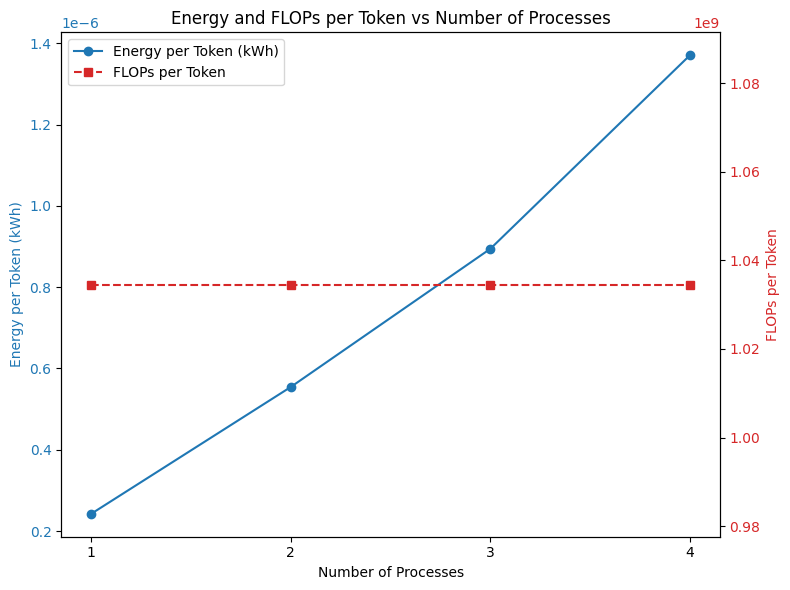

In [24]:
import matplotlib.pyplot as plt

# Use the 'num_processes' subset for plotting.
num_proc_df = dfs['num_processes'].copy()

# Ensure num_processes is an integer for plotting
num_proc_df['num_processes'] = num_proc_df['num_processes'].astype(int)

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Energy per Token on the left y-axis
color_energy = 'tab:blue'
ax1.set_xlabel('Number of Processes')
ax1.set_ylabel('Energy per Token (kWh)', color=color_energy)
ax1.plot(num_proc_df['num_processes'], num_proc_df['energy_per_token_kwh'],
         marker='o', linestyle='-', color=color_energy, label='Energy per Token (kWh)')
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.set_xticks(sorted(num_proc_df['num_processes'].unique()))

# Create a secondary axis for FLOPs per Token
ax2 = ax1.twinx()
color_flops = 'tab:red'
ax2.set_ylabel('FLOPs per Token', color=color_flops)
ax2.plot(num_proc_df['num_processes'], num_proc_df['flops_per_token'],
         marker='s', linestyle='--', color=color_flops, label='FLOPs per Token')
ax2.tick_params(axis='y', labelcolor=color_flops)

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Add a title
plt.title('Energy and FLOPs per Token vs Number of Processes')

fig.tight_layout()
plt.show()


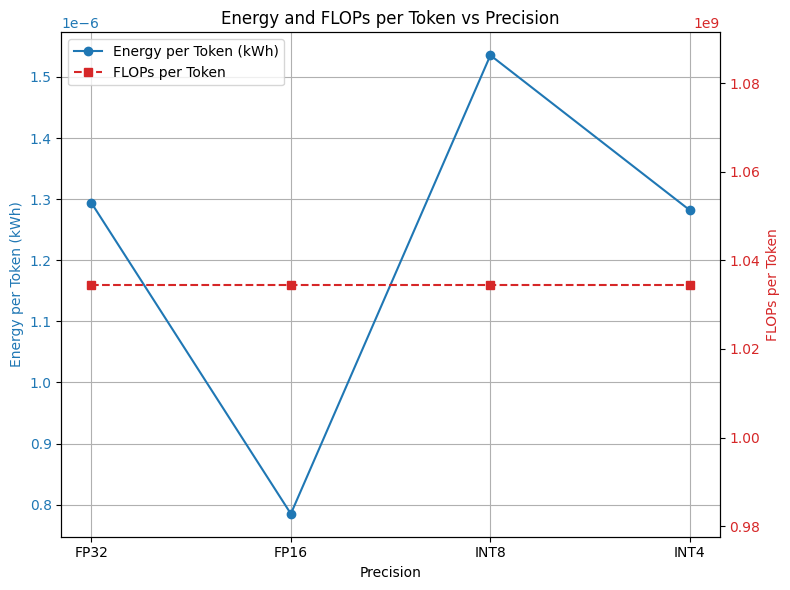

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a new 'precision' column for plotting.
def determine_precision(row):
    if row.get('load_in_4bit', False):
        return 'INT4'
    elif row.get('load_in_8bit', False):
        return 'INT8'
    elif row.get('fp_precision') == 'torch.float16':
        return 'FP16'
    else:
        return 'FP32'

# Use the 'precis' subset for plotting.
precision_df = dfs['precis'].copy()
precision_df['precision'] = precision_df.apply(determine_precision, axis=1)

# Step 2: Define custom precision order.
precision_order = ['FP32', 'FP16', 'INT8', 'INT4']

# Step 3: Sort the DataFrame according to the precision order.
precision_df['precision'] = pd.Categorical(precision_df['precision'], categories=precision_order, ordered=True)
precision_df = precision_df.sort_values('precision')

# Step 4: Plotting using styling similar to the num_processes plot.
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Energy per Token on the left y-axis.
color_energy = 'tab:blue'
ax1.set_xlabel('Precision')
ax1.set_ylabel('Energy per Token (kWh)', color=color_energy)
ax1.plot(precision_df['precision'], precision_df['energy_per_token_kwh'],
         marker='o', linestyle='-', color=color_energy, label='Energy per Token (kWh)')
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.grid(True)

# Create a secondary axis for FLOPs per Token.
ax2 = ax1.twinx()
color_flops = 'tab:red'
ax2.set_ylabel('FLOPs per Token', color=color_flops)
ax2.plot(precision_df['precision'], precision_df['flops_per_token'],
         marker='s', linestyle='--', color=color_flops, label='FLOPs per Token')
ax2.tick_params(axis='y', labelcolor=color_flops)

# Create combined legend.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Add a title.
plt.title('Energy and FLOPs per Token vs Precision')

fig.tight_layout()
plt.show()


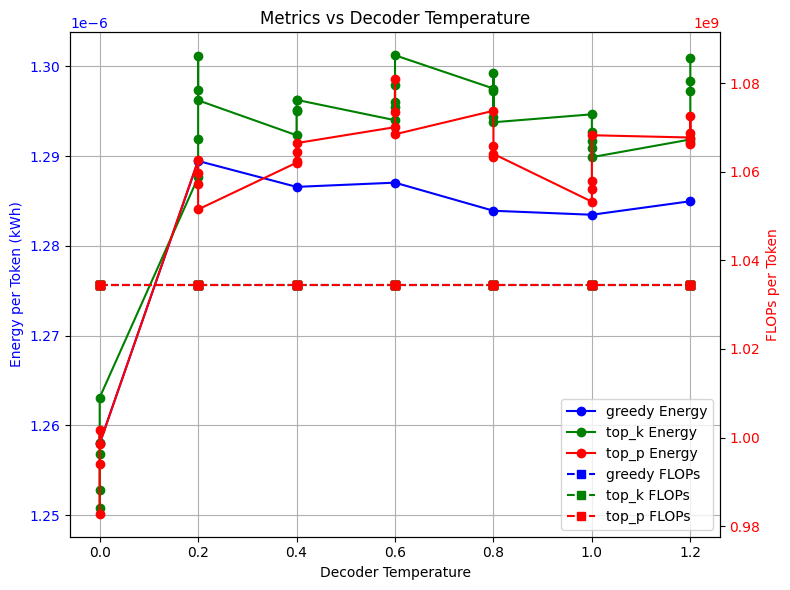

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

decoding_df = dfs['decoding'].copy()

# --- Use the table columns directly ---
# (Optionally filter out rows where decoding mode is missing.)
decoding_df = decoding_df[decoding_df['decoder_config_decoding_mode'].notna()].copy()

# Assign the method and temperature columns from your table.
decoding_df['method'] = decoding_df['decoder_config_decoding_mode']
decoding_df['temperature'] = decoding_df['decoder_temperature']

# Optionally, if you want to consider only specific methods, filter them:
decoding_df = decoding_df[decoding_df['method'].isin(['greedy', 'top_k', 'top_p'])]

# --- Step 3: Plotting ---
# Define colors for each method to keep things consistent.
colors = {
    'greedy': 'blue',
    'top_k': 'green',
    'top_p': 'red'
}
methods = decoding_df['method'].unique()

# Create a figure with one subplot.
fig, ax1 = plt.subplots(figsize=(8, 6))

# --- Dual Axes for Energy per Token and FLOPs per Token vs Temperature ---
# Primary axis for Energy per Token.
for m in methods:
    subdf = decoding_df[decoding_df['method'] == m]
    ax1.plot(
        subdf['temperature'],
        subdf['energy_per_token_kwh'],
        marker='o',
        linestyle='-',
        label=f'{m} Energy',
        color=colors.get(m)
    )
ax1.set_xlabel('Decoder Temperature')
ax1.set_ylabel('Energy per Token (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Metrics vs Decoder Temperature')
ax1.grid(True)

# Create a secondary axis for FLOPs per Token.
ax2 = ax1.twinx()
for m in methods:
    subdf = decoding_df[decoding_df['method'] == m]
    ax2.plot(
        subdf['temperature'],
        subdf['flops_per_token'],
        marker='s',
        linestyle='--',
        label=f'{m} FLOPs',
        color=colors.get(m)
    )
ax2.set_ylabel('FLOPs per Token', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

fig.tight_layout()
plt.show()


to do: 
- [ ] print the other decoder configs at the x axis as well

# Modeling

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.246
Model:                              OLS   Adj. R-squared:                  0.210
Method:                   Least Squares   F-statistic:                     6.919
Date:                  Tue, 15 Apr 2025   Prob (F-statistic):           7.17e-05
Time:                          17:40:41   Log-Likelihood:                 1103.3
No. Observations:                    90   AIC:                            -2197.
Df Residuals:                        85   BIC:                            -2184.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

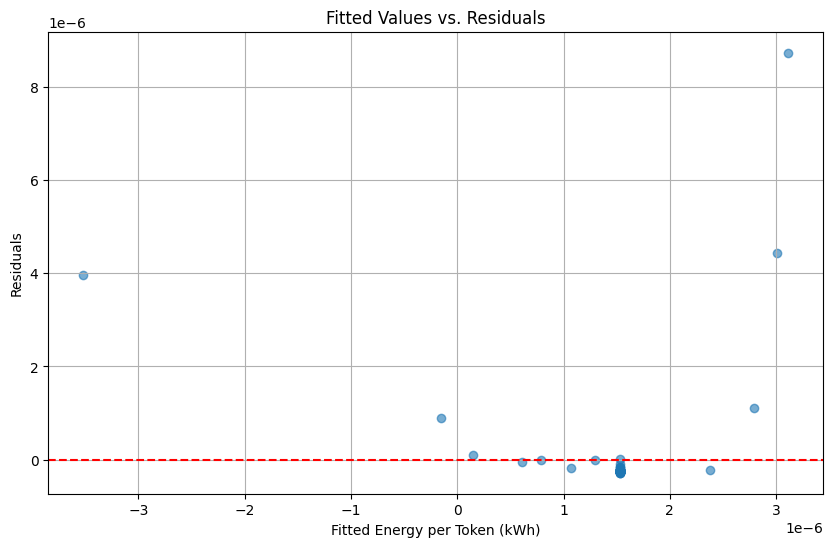

In [10]:
%run scripts/c_base_regression.py

                   Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    energy_per_token_kwh
No. Observations:    90         Method:                ML                  
No. Groups:          90         Scale:                 0.0000              
Min. group size:     1          Log-Likelihood:        1103.3141           
Max. group size:     1          Converged:             Yes                 
Mean group size:     1.0                                                   
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.000    0.000  0.444 0.657 -0.000  0.000
C(fp_precision)[T.torch.float32]  0.000    0.000  0.357 0.721 -0.000  0.000
C(quantization)[T.True]           0.000    0.000  0.881 0.378 -0.000  0.000
batch_size_numeric             

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


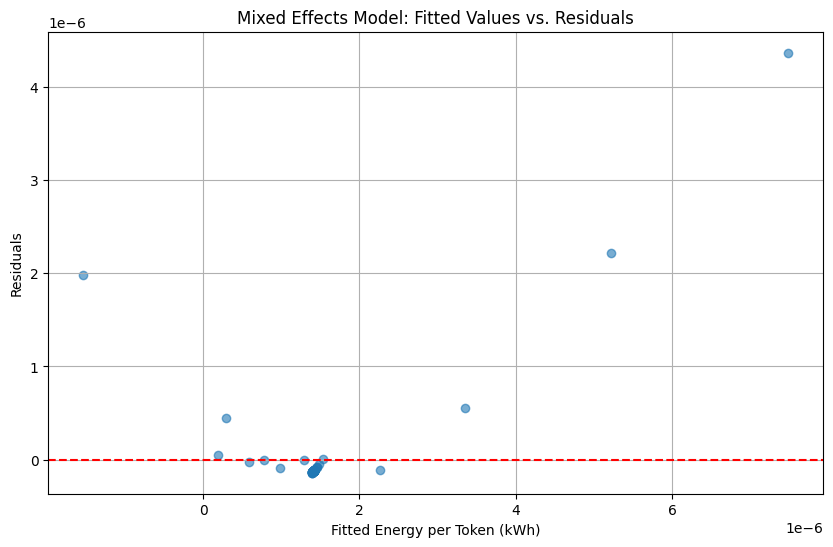

In [11]:
%run scripts/d_mixed_effects_model.py

To do
- [ ] identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 